### 데이터셋 기본세팅

In [1]:
# 라이브러리 불러오기
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# mpg 데이터셋 불러오기
df_mpg = sns.load_dataset('mpg')

In [3]:
# 결측치 확인
df_mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [4]:
# 결측치 제거하기
df_mpg.dropna(inplace=True)

In [5]:
# 데이터 선택
df_x = df_mpg[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]

* 결측치 만들기

In [6]:
import random

In [7]:
mvs = np.random.randint(0,392, size=30)

In [8]:
df_x.iloc[mvs]=np.nan

In [9]:
df_x.isna().sum()

cylinders       30
displacement    30
horsepower      30
weight          30
acceleration    30
dtype: int64

In [10]:
df_x

,cylinders,displacement,horsepower,weight,acceleration
0,8.0,307.0,130.0,3504.0,12.0
1,8.0,350.0,165.0,3693.0,11.5
2,8.0,318.0,150.0,3436.0,11.0
3,8.0,304.0,150.0,3433.0,12.0
4,8.0,302.0,140.0,3449.0,10.5
...,...,...,...,...,...
393,4.0,140.0,86.0,2790.0,15.6
394,4.0,97.0,52.0,2130.0,24.6
395,4.0,135.0,84.0,2295.0,11.6
396,4.0,120.0,79.0,2625.0,18.6


In [11]:
df_mpg['mpg'].dropna()

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

### 1. median 대체 (SimpleImputer)

In [12]:
# 라이브러리 불러오기 및 SimpleImputer 객체 만들기
from sklearn.impute import SimpleImputer
sim_median = SimpleImputer(strategy='median')

In [13]:
# 결측치를 median으로 대체
df_median = sim_median.fit_transform(df_x)

In [14]:
# 데이터 세트 분리하기
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_median, df_mpg['mpg'], test_size=0.3, random_state=111)

In [15]:
# statmodel 에서 제공하는 OLS 회귀를 통해 학습
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [16]:
# median으로 대체한 값들의 회귀분석
fit_train1 = sm.OLS(y_train, x_train)
fit_train1=fit_train1.fit()

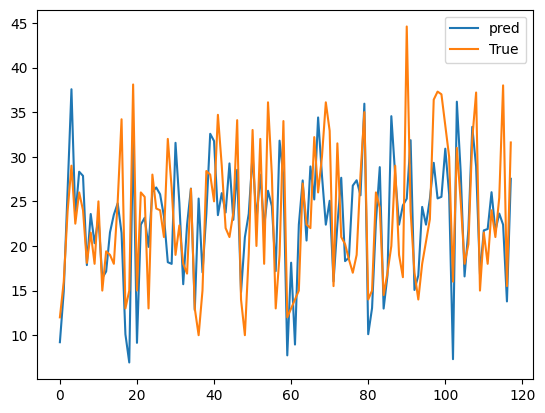

In [17]:
# 실제값과 예측값의 그래프 그리기
plt.plot(np.array(fit_train1.predict(x_test)), label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [18]:
# MSE 구하기
from sklearn.metrics import mean_squared_error

mse_median = mean_squared_error(y_true= y_test, y_pred=fit_train1.predict(x_test))
print(mse_median)

39.13557784865249


### 2. 선형보간

In [19]:
# 선형보간
df_linear = df_x.interpolate(method='linear')

In [20]:
# 데이터 세트 분리하기
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_linear, df_mpg['mpg'], test_size=0.3, random_state=111)

In [21]:
# statmodel 에서 제공하는 OLS 회귀를 통해 학습
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [22]:
# 선형보간 값들의 회귀분석
fit_train1 = sm.OLS(y_train, x_train)
fit_train1=fit_train1.fit()

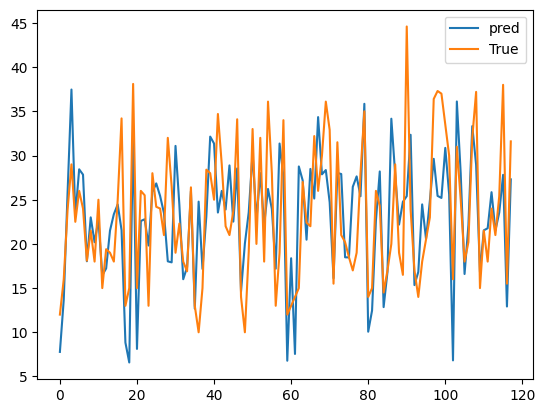

In [23]:
# 실제값과 예측값의 그래프 그리기
plt.plot(np.array(fit_train1.predict(x_test)), label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [24]:
# MSE 구하기
from sklearn.metrics import mean_squared_error

mse_linear = mean_squared_error(y_true= y_test, y_pred=fit_train1.predict(x_test))
print(mse_linear)

37.19397597588273


### 3. IterativeImputer

In [25]:
# 라이브러리 불러오기
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [26]:
# IterativeImputer 객체 만들기
imputer=IterativeImputer()

In [27]:
# 결측치 대체
df_imp = imputer.fit_transform(df_x)

In [28]:
# 데이터 세트 분리하기
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_imp, df_mpg['mpg'], test_size=0.3, random_state=111)

In [29]:
# statmodel 에서 제공하는 OLS 회귀를 통해 학습
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [30]:
# IterativeImputer로 대체한 값들의 회귀분석
fit_train1 = sm.OLS(y_train, x_train)
fit_train1=fit_train1.fit()

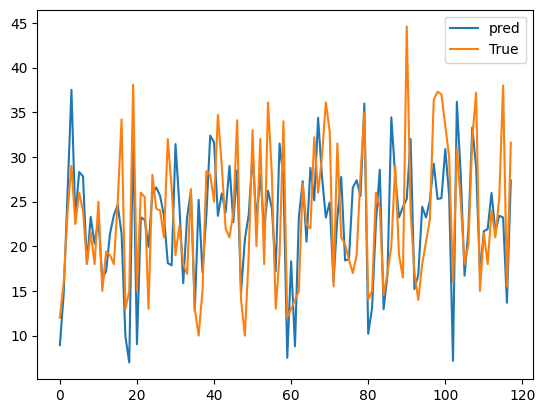

In [31]:
# 실제값과 예측값의 그래프 그리기
plt.plot(np.array(fit_train1.predict(x_test)), label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [32]:
# MSE 구하기
from sklearn.metrics import mean_squared_error

mse_imp = mean_squared_error(y_true= y_test, y_pred=fit_train1.predict(x_test))
print(mse_imp)

38.781013005331346


**결측치 대체 방법에 따라 MSE 값이 차이가 나는 이유**

1. SimpleImputer - Median
  : 중앙값을 사용해서 결측치를 대체하면 평균보다 이상치의 영향을 작게 받지만, 지나친 일반화로 인해 다른 특성들은 반영이 되지 않을 수 있다. 이러한 이유 때문에 MSE 값이 세 가지 방법 중에 가장 높았다고 생각한다.

2. 선형보간
 : 선형보간은 데이터의 특성이 선형성인지, 비선형성인지에 따라 MSE값이 달라질 것이다. MSE값을 보았을 때, mpg 데이터는 선형성을 보여서 실제값과 예측값의 차이가 가장 작았다고 생각한다.

3. IterativeImputer
 : 이 방법은 반복적으로 모델을 학습해서 결측치를 대체하는 방법인데, 이 과정에서 활용되는 모델의 성능에 따라 MSE값이 달라질 것이라고 생각이 든다.

결론적으로, 결측치처리 방법에서 중점으로 여기는 데이터 특성에 따라 MSE 값이 차이가 난다고 생각한다.